In [3]:
# 💳 PaySim Fraud Detection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# 📥 Load dataset
df = pd.read_csv('paysim.csv')  # Make sure the file is in your working directory
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


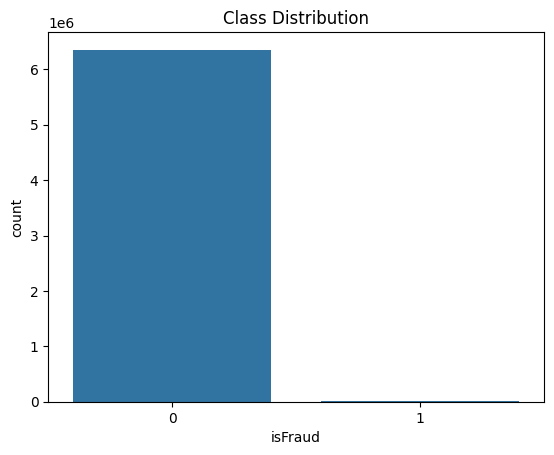

In [5]:
# 🔍 Class Distribution
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution')
plt.show()


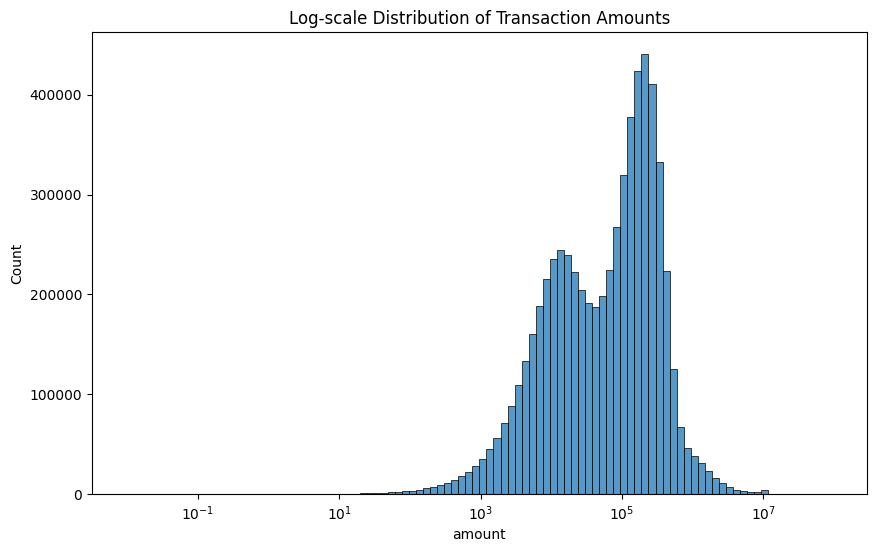

In [6]:
# 💰 Log-scaled Transaction Amount Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=100, log_scale=True)
plt.title('Log-scale Distribution of Transaction Amounts')
plt.show()


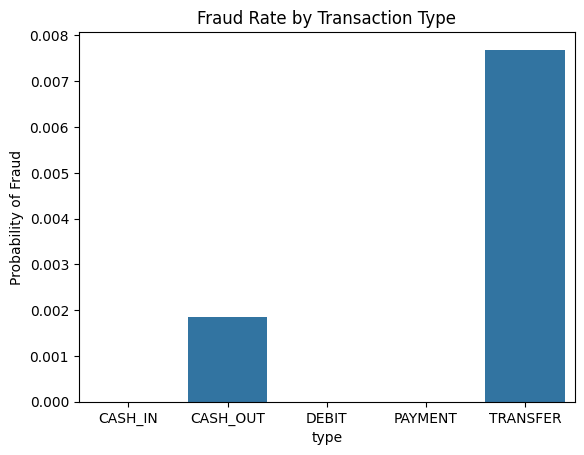

In [7]:
# 📊 Fraud Rate by Transaction Type
type_fraud = df.groupby('type')['isFraud'].mean().reset_index()
sns.barplot(x='type', y='isFraud', data=type_fraud)
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Probability of Fraud')
plt.show()


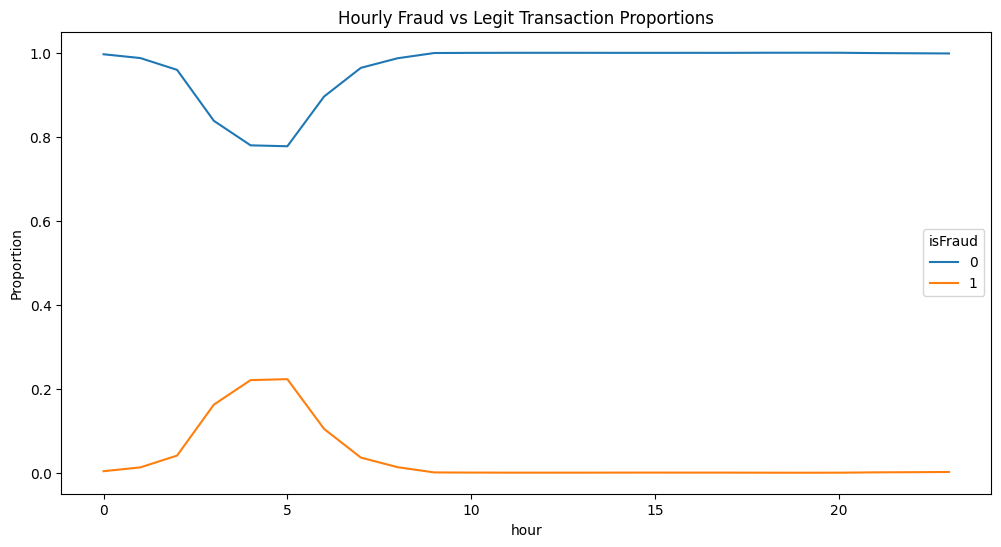

In [8]:
# 🕒 Fraud Trends by Hour
df['hour'] = pd.to_datetime(df['step'], unit='h', origin='2017-01-01').dt.hour
hourly = df.groupby(['hour','isFraud']).size().unstack(fill_value=0)
hourly_prop = hourly.div(hourly.sum(axis=1), axis=0)
hourly_prop.plot(kind='line', figsize=(12,6))
plt.title('Hourly Fraud vs Legit Transaction Proportions')
plt.ylabel('Proportion')
plt.show()


In [ ]:
# 🧠 Model Training with SMOTE + Logistic Regression
X = df[['amount']]
y = df['isFraud']

# Balancing the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# 📈 Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

